<div dir="rtl">
    <div style="text-align: center;">
        <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">بسمه تعالی</h1>
</div>

<h1 align="left">🌟 Project Title:</h1>
<h3 align="center">🚀 <b>Intelligent Oil Price Prediction Using Advanced Machine Learning Models and Neural Networks</b></h3>

<div style="text-align: center;">
    <a href="https://github.com/M-RezaeiGH">
        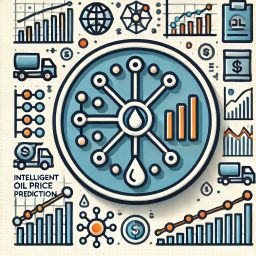
    </a>
</div>

<br><hr><br>

<h1 align="left">👨‍💻 Developer:</h1>
<h3 align="left">*** Mohammad Reza Rezaei ***</h3>

<div align="left">
  🔗 <a href="https://www.linkedin.com/in/m-rezaei/">LinkedIn</a> | 
  📂 <a href="https://github.com/M-RezaeiGH">GitHub</a>
</div>


##

## 📊 Dataset Introduction:
The dataset contains **1,262,329 rows** of real crude oil price data, which includes the following columns:

1. 📅 **DATE**: The date corresponding to the oil price.
2. ⏰ **TIME**: The time associated with the oil price.
3. 💰 **OPEN**: The opening price of oil at a specific time.
4. 📈 **HIGH**: The highest price of oil at a specific time.
5. 📉 **LOW**: The lowest price of oil at a specific time.
6. 🔒 **CLOSE**: The closing price of oil at a specific time.
7. 🔄 **TICKVOL**: The number of times the price of an asset (oil) has changed within a specific time frame. Higher TICKVOL indicates more price volatility and higher trading volume.
8. 📦 **VOL**: The total number of units of oil (barrels) traded within a specific time frame. VOL is crucial for determining the strength of a trend.
9. 📊 **SPREAD**: The difference between the bid price and the ask price at a given time. Values of 0, 1, and 2 indicate different spread levels (0 for tight, 1 for medium, 2 for wider spread).


##

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-weight: bold;">&star; Step 2: Stationarity Check (Before Data Cleaning) - Forecasting Using the ARIMA Model </h1>
    </div>
</div>

### Notebook Description:
The goal of this step is to examine the stationarity of the entire DataFrame before preprocessing and cleaning operations. In the next DataFrame, the stationarity check is performed after these operations. The reason for this is that standards state that the order of checking stationarity and data management depends on various factors, including the type of data, modeling methods, forecasting, and the personal preferences of specialists.


<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Libraries Installation: </h1>
    </div>
</div>

In [1]:
#!pip install klib
# !pip install --upgrade statsmodels

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Import Necessary Libraries: </h1>
    </div>
</div>

In [2]:
from src import DATA_DIR
import pandas as pd
import numpy as np
from numpy import where
from datetime import datetime
import klib
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from pylab import rcParams
from plotly import tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
# from statsmodels.tsa.stattools import eacf
# from pmdarima.arima import ndiffs, nsdiffs, EACF

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

import ydata_profiling as ydp
import ydata_profiling
import pkg_resources
import IPython

import warnings
warnings.filterwarnings('ignore')
# اصلاح خطاها در کتابخانه Numba
from numba import jit

C:\Users\mbare\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning:

numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.

C:\Users\mbare\AppData\Local\Programs\Python\Python310\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.



<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Libraries Version Auto-Code: </h1>
    </div>
</div>

In [3]:
import pkg_resources

def get_package_version(package_name):
    try:
        package_version = pkg_resources.get_distribution(package_name).version
        return package_version
    except pkg_resources.DistributionNotFound:
        return None

imported_libraries = ['numpy', 'pandas','src','seaborn','matplotlib','scipy','plotly','sklearn','IPython','numba','statsmodels',
                     'klib',]

for library in imported_libraries:
    version = get_package_version(library)
    if version:
        print(f"{library}: {version}")
    else:
        print(f"{library}: Not found")

numpy: 1.23.5
pandas: 1.5.3
src: Not found
seaborn: 0.12.2
matplotlib: 3.6.3
scipy: 1.9.3
plotly: 5.23.0
sklearn: Not found
IPython: 8.11.0
numba: 0.57.0
statsmodels: 0.13.5
klib: 1.1.2


<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Read Data from my SRC folder: </h1>
    </div>
</div>

In [4]:
# # with google drive:
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = "/content/drive/MyDrive/df_Step1_EDA.csv"

In [6]:
df = pd.read_csv(file_path,infer_datetime_format=True)
print(df.shape)
df.tail()

(1262327, 9)


,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
1262322,2020.09.29,14:30:00,40.31,40.32,40.27,40.27,7,0,2
1262323,2020.09.29,14:31:00,40.28,40.31,40.27,40.28,9,0,1
1262324,2020.09.29,14:32:00,40.28,40.28,40.25,40.25,6,0,1
1262325,2020.09.29,14:33:00,40.26,40.26,40.25,40.26,7,0,1
1262326,2020.09.29,14:34:00,40.26,40.26,40.26,40.26,1,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262327 entries, 0 to 1262326
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   <DATE>     1262327 non-null  object 
 1   <TIME>     1262327 non-null  object 
 2   <OPEN>     1262327 non-null  float64
 3   <HIGH>     1262327 non-null  float64
 4   <LOW>      1262327 non-null  float64
 5   <CLOSE>    1262327 non-null  float64
 6   <TICKVOL>  1262327 non-null  int64  
 7   <VOL>      1262327 non-null  int64  
 8   <SPREAD>   1262327 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 86.7+ MB


In [8]:
df.columns = df.columns.str.replace('<', '').str.replace('>', '')
df.head()

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2006.02.03,00:00:00,64.77,65.48,63.93,65.37,251,0,0
1,2006.02.06,00:00:00,66.35,66.50,64.77,65.11,223,0,0
2,2006.02.07,00:00:00,64.84,64.90,62.81,63.09,244,0,0
3,2006.02.08,00:00:00,62.96,63.44,62.29,62.55,190,0,0
4,2006.02.09,00:00:00,62.68,63.73,62.38,62.62,265,0,0


# Defining Categorical Features :

In [9]:
cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_columns)

['DATE', 'TIME']


In [10]:
#First Approach:
df['DATE'] = df['DATE'].str.replace('.','-')
df['DATE'] = df['DATE'] +'  ' + df['TIME']
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.drop(['TIME'], axis=1)
# df.index = df['date']

#Second Approach:
# df['DATE'] = pd.to_datetime(df['DATE'])
# df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M:%S')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262327 entries, 0 to 1262326
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   DATE     1262327 non-null  datetime64[ns]
 1   OPEN     1262327 non-null  float64       
 2   HIGH     1262327 non-null  float64       
 3   LOW      1262327 non-null  float64       
 4   CLOSE    1262327 non-null  float64       
 5   TICKVOL  1262327 non-null  int64         
 6   VOL      1262327 non-null  int64         
 7   SPREAD   1262327 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 77.0 MB


In [11]:
cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_columns)

[]


# Holiday Analysis:

Days when the markets are closed may not have a significant impact on oil price trends; therefore, removing them can help improve the accuracy and predictive capability of the model.


### Analysis of DATE Column:

In [14]:
# first day and last day of the DATE column:

##way1:
min_date = df['DATE'].min()
max_date = df['DATE'].max()
print(f"محدوده تاریخ: {min_date} تا {max_date}")

#way2:
df['DATE'].describe(datetime_is_numeric = True)

محدوده تاریخ: 2006-02-03 00:00:00 تا 2020-09-29 14:34:00


count                          1262327
mean     2018-08-02 12:07:40.051414016
min                2006-02-03 00:00:00
25%                2017-07-06 21:30:30
50%                2018-08-21 15:41:00
75%                2019-09-16 15:37:30
max                2020-09-29 14:34:00
Name: DATE, dtype: object

In [15]:
from datetime import datetime, timedelta

# Get the list of weekends in 2006
weekends_2006 = []

# Loop through all days in 2006, adjusting for February's varying length
for month in range(1, 13):
    # Determine the number of days in the month
    num_days = 28 if month == 2 and not (2006 % 4 == 0 and 2006 % 100 != 0) else \
               31 if month in [1, 3, 5, 7, 8, 10, 12] else 30
    
    # Loop for each day in the month
    for day in range(1, num_days + 1):
        date = datetime(2006, month, day)
        
        # Check if the date is a weekend (Saturday or Sunday)
        if date.weekday() in [5, 6]:
            weekends_2006.append(date)

# Check if any of the first 100 rows of df are weekends
is_weekend = False
for i in range(100):
    if df["DATE"].iloc[i] in weekends_2006:
        is_weekend = True
        break

# Print the result
if is_weekend:
    print("There are weekends in the first 100 rows of Data & must be analyzed.")
else:
    print("There are no weekends in the first 100 rows of Data df.")


There are weekends in the first 100 rows of Data & Must be analysed.


In [16]:
# Create a copy of the original DataFrame
df1 = df.copy()

# List of official US holidays
us_holidays = pd.to_datetime([
    # Holidays in 2006
    '2006-01-01',  # New Year's Day
    '2006-01-16',  # Martin Luther King Jr. Day
    '2006-02-20',  # Presidents' Day
    '2006-05-29',  # Memorial Day
    '2006-07-04',  # Independence Day
    '2006-09-04',  # Labor Day
    '2006-10-09',  # Columbus Day
    '2006-11-11',  # Veterans Day
    '2006-11-23',  # Thanksgiving Day
    '2006-12-25',  # Christmas Day

    # Holidays in 2007
    '2007-01-01', '2007-01-15', '2007-02-19', '2007-05-28', 
    '2007-07-04', '2007-09-03', '2007-10-08', '2007-11-12', 
    '2007-11-22', '2007-12-25',
    
    # Holidays in 2008
    '2008-01-01', '2008-01-21', '2008-02-18', '2008-05-26', 
    '2008-07-04', '2008-09-01', '2008-10-13', '2008-11-11', 
    '2008-11-27', '2008-12-25',
    
    # Holidays in 2009
    '2009-01-01', '2009-01-19', '2009-02-16', '2009-05-25', 
    '2009-07-03', '2009-09-07', '2009-10-12', '2009-11-11', 
    '2009-11-26', '2009-12-25',
    
    # Holidays in 2010
    '2010-01-01', '2010-01-18', '2010-02-15', '2010-05-31', 
    '2010-07-05', '2010-09-06', '2010-10-11', '2010-11-11', 
    '2010-11-25', '2010-12-24',
    
    # Holidays in 2011
    '2011-01-01', '2011-01-17', '2011-02-21', '2011-05-30', 
    '2011-07-04', '2011-09-05', '2011-10-10', '2011-11-11', 
    '2011-11-24', '2011-12-26',
    
    # Holidays in 2012
    '2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28', 
    '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12', 
    '2012-11-22', '2012-12-25',
    
    # Holidays in 2013
    '2013-01-01', '2013-01-21', '2013-02-18', '2013-05-27', 
    '2013-07-04', '2013-09-02', '2013-10-14', '2013-11-11', 
    '2013-11-28', '2013-12-25',
    
    # Holidays in 2014
    '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26', 
    '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', 
    '2014-11-27', '2014-12-25',
    
    # Holidays in 2015
    '2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25', 
    '2015-07-03', '2015-09-07', '2015-10-12', '2015-11-11', 
    '2015-11-26', '2015-12-25',
    
    # Holidays in 2016
    '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', 
    '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', 
    '2016-11-24', '2016-12-26',
    
    # Holidays in 2017
    '2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29', 
    '2017-07-04', '2017-09-04', '2017-10-09', '2017-11-10', 
    '2017-11-23', '2017-12-25',
    
    # Holidays in 2018
    '2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28', 
    '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12', 
    '2018-11-22', '2018-12-25',
    
    # Holidays in 2019
    '2019-01-01', '2019-01-21', '2019-02-18', '2019-05-27', 
    '2019-07-04', '2019-09-02', '2019-10-14', '2019-11-11', 
    '2019-11-28', '2019-12-25',
    
    # Holidays in 2020
    '2020-01-01', '2020-01-20', '2020-02-17', '2020-05-25', 
    '2020-07-03', '2020-09-07', '2020-10-12', '2020-11-11', 
    '2020-11-26', '2020-12-25'
])

# Add a column for the day of the week (0 = Monday, 6 = Sunday)
df1['day_of_week'] = df1['DATE'].dt.dayofweek

# Filter for weekend days (Saturday and Sunday)
weekends = df1[(df1['day_of_week'] == 5) | (df1['day_of_week'] == 6)]

# Filter for days that match official holidays
holidays = df1[df1['DATE'].isin(us_holidays)]

# Combine weekends and official holidays, removing duplicates
all_holidays = pd.concat([weekends, holidays]).drop_duplicates()

# Count the number of holidays
number_of_holidays = len(all_holidays)
print(f"Number of holidays in the dataset: {number_of_holidays}")


Number of holidays in the dataset: 829


In [18]:
weekends.head(10)

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,day_of_week
34,2006-04-01 00:00:00,68.10,68.19,66.80,67.93,262,0,0,5
1093,2010-12-04 00:00:00,87.94,87.94,87.94,87.94,1,0,0,5
1120,2011-01-08 16:00:00,91.75,91.75,91.75,91.75,1,0,0,5
2026,2013-08-24 00:00:00,86.51,86.51,86.51,86.51,1,0,0,5
2190,2014-03-01 00:00:00,85.79,85.79,85.79,85.79,1,0,0,5
2307,2014-07-12 00:00:00,92.31,92.31,92.31,92.31,1,0,0,5
2462,2015-01-10 00:00:00,56.93,56.93,56.93,56.93,2,0,0,5
4469,2016-04-10 23:00:00,39.31,39.31,39.31,39.31,1,0,0,6
423822,2017-11-11 00:00:00,56.88,56.89,56.88,56.88,3,0,3,5
423823,2017-11-11 00:02:00,56.88,56.88,56.88,56.88,2,0,3,5


In [19]:
holidays.head(10)

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,day_of_week
92,2006-07-04,74.95,75.15,74.28,74.34,114,0,0,1
128,2006-09-04,71.40,71.44,69.93,70.05,168,0,0,0
153,2006-10-09,61.45,62.73,61.13,61.49,317,0,0,0
210,2007-01-15,54.20,54.50,53.35,53.84,195,0,0,0
315,2007-07-04,71.67,71.90,71.32,71.83,101,0,0,2
349,2007-09-03,72.45,73.07,72.45,72.91,79,0,0,0
374,2007-10-08,80.13,80.24,77.85,78.40,306,0,0,0
399,2007-11-12,95.76,96.18,93.55,94.62,413,0,0,0
436,2008-01-21,90.22,90.29,87.85,88.05,272,0,0,0
455,2008-02-18,95.33,96.43,95.33,96.03,151,0,0,0


<div dir="ltr" style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">&#9899; Assigning Holiday Data:</h1>
    <p style="font-family: 'B Nazanin', sans-serif; font-size: 18px; text-align: justify;">
        Although holidays are present in the database, some oil sellers and brokers announce their prices on these days as well. 
        <br>
        Therefore, the impact of these days on crude oil prices can be studied as a separate topic.
    </p>
</div>


#

<div dir="ltr" style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">&star; Analysis of the Impact of Other Columns on the DATE Column:</h1>
    <p style="font-family: 'B Nazanin', sans-serif; font-size: 16px; text-align: justify;">
    </p>
</div>


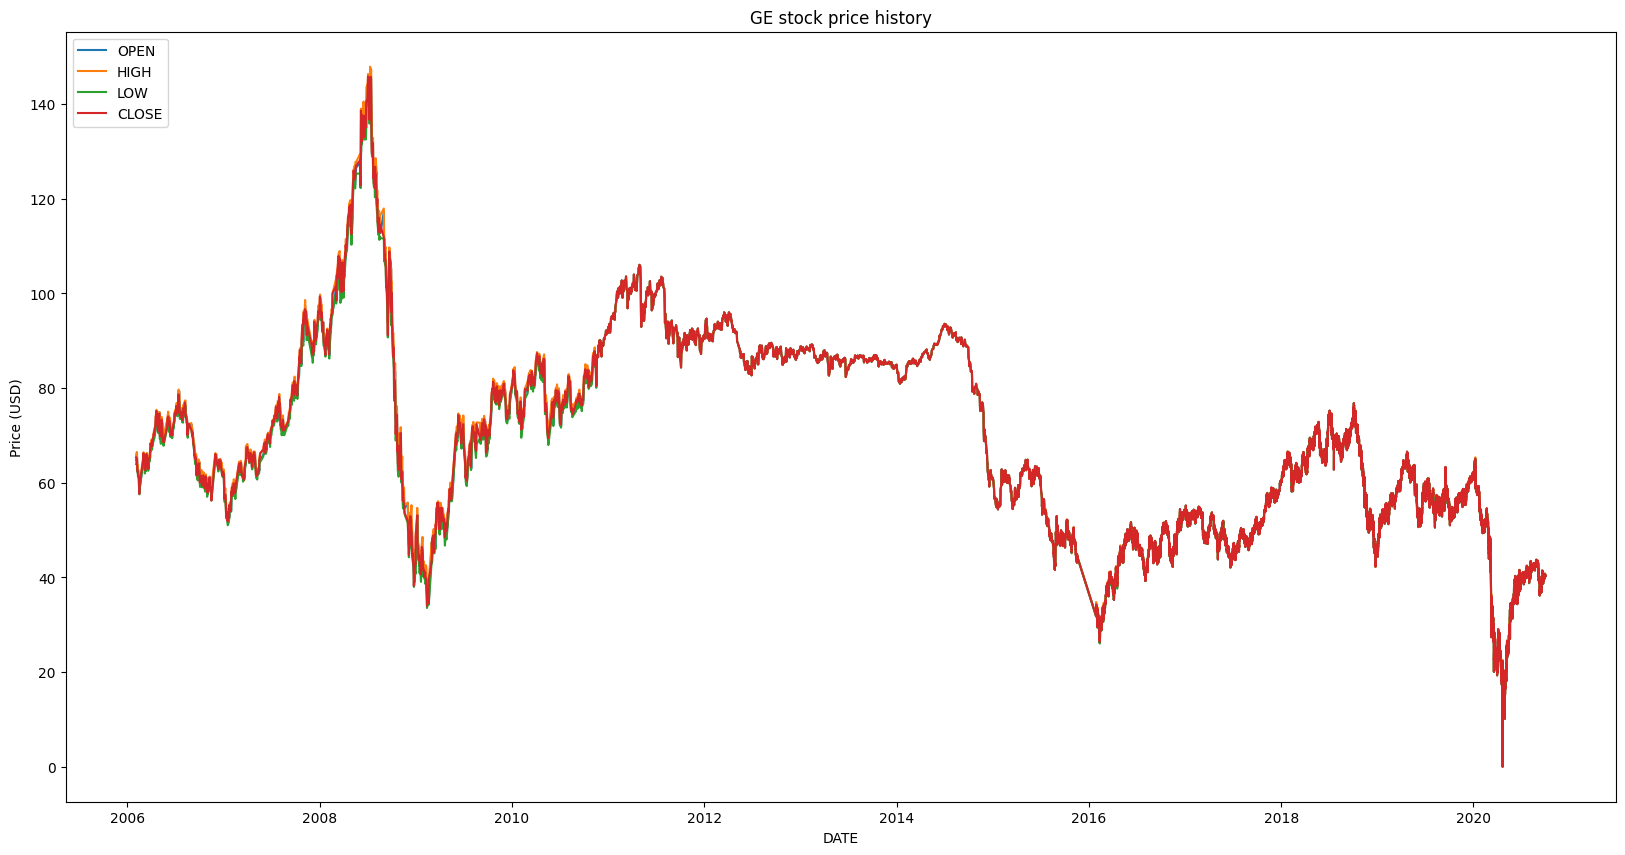

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(df["DATE"], df["OPEN"])
plt.plot(df["DATE"], df["HIGH"])
plt.plot(df["DATE"], df["LOW"])
plt.plot(df["DATE"], df["CLOSE"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('DATE')
plt.legend(['OPEN', 'HIGH', 'LOW', 'CLOSE'], loc='upper left')
plt.show()

### &#9899; Result: So we see that columns of " open, high, low " and close prices don’t vary too much

### **<span style="color: red; font-weight: bold;">* in the basis of this result, we consider two column of DATE and CLOSE as much important features which effect our algorithms.*</span>**


<div >
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">&star; OHLC Charts Analysis :</h1>
</div>
An OHLC chart is any type of price chart that shows the open, high, low and close price of a certain time period. Open-high-low-close Charts (or OHLC Charts) are used as a trading tool to visualise and analyse the price changes over time for securities, currencies, stocks, bonds, commodities, etc. OHLC Charts are useful for interpreting the day-to-day sentiment of the market and forecasting any future price changes through the patterns produced.

The y-axis on an OHLC Chart is used for the price scale, while the x-axis is the timescale. On each single time period, an OHLC Charts plots a symbol that represents two ranges: the highest and lowest prices traded, and also the opening and closing price on that single time period (for example in a day). On the range symbol, the high and low price ranges are represented by the length of the main vertical line. The open and close prices are represented by the vertical positioning of tick-marks that appear on the left (representing the open price) and on right (representing the close price) sides of the high-low vertical line.

Colour can be assigned to each OHLC Chart symbol, to distinguish whether the market is "bullish" (the closing price is higher then it opened) or "bearish" (the closing price is lower then it opened).

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg">

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/OHLC_chart.html)

<div dir="ltr" style="text-align: left;">
    The `configure_plotly_browser_state` function is used to **set up and configure the browser environment for displaying Plotly charts**.
</div>


In [21]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [22]:
# # OHLC chart:
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, iplot
# from pylab import rcParams
# from plotly import tools


# trace = go.Ohlc(x=df.index,
#                 open=df.OPEN,
#                 high=df.HIGH,
#                 low=df.LOW,
#                 close=df.CLOSE)
# data = [trace]
# configure_plotly_browser_state()
# iplot(data, filename='simple_ohlc')

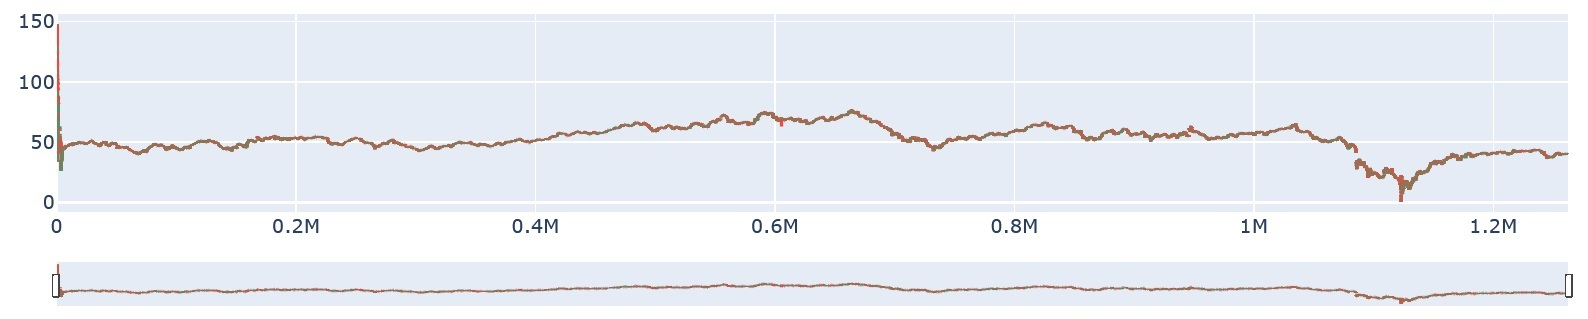

<div dir="ltr" style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">&star; Examining Stationarity of Time Series:</h1>
    <p style="font-family: 'B Nazanin', sans-serif; font-size: 16px; text-align: justify;">
    </p>
</div>


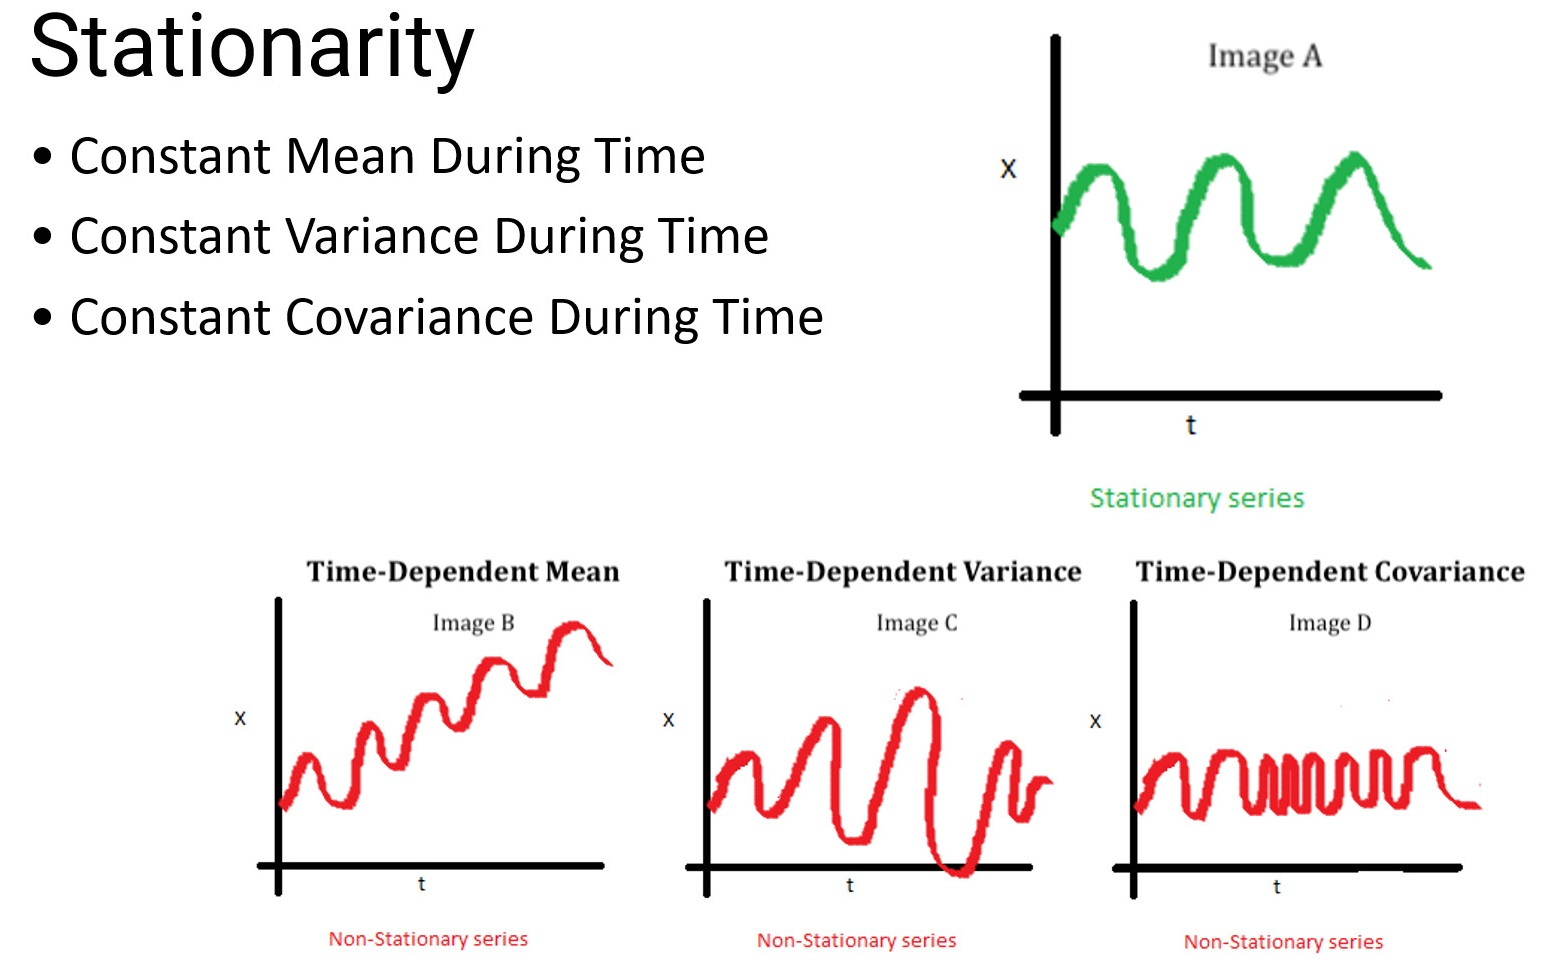

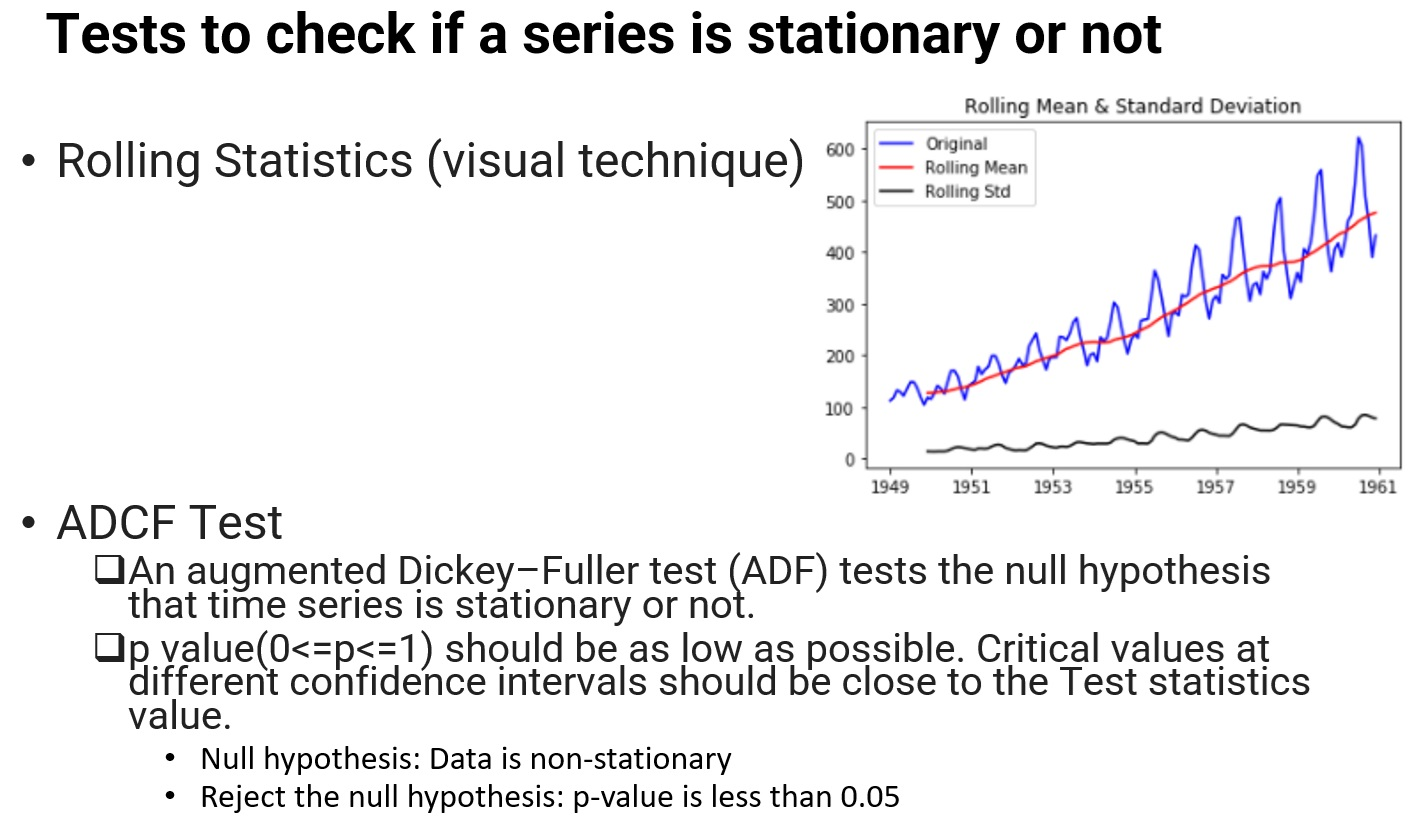

In [23]:
df = df.set_index(['DATE'])
df.head()

,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
DATE,,,,,,,
2006-02-03,64.77,65.48,63.93,65.37,251,0,0
2006-02-06,66.35,66.50,64.77,65.11,223,0,0
2006-02-07,64.84,64.90,62.81,63.09,244,0,0
2006-02-08,62.96,63.44,62.29,62.55,190,0,0
2006-02-09,62.68,63.73,62.38,62.62,265,0,0


<div dir="ltr" style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">1- Examining Correlation:</h1>
</div>


<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

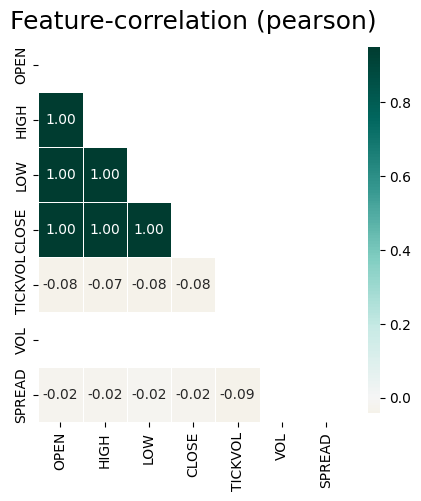

In [24]:
# import klib

klib.corr_plot(df, annot=True, figsize = (5,5))

<div dir="ltr" style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">&#9899; Result of Correlation Analysis:</h1>
    <p style="font-family: 'B Nazanin', sans-serif; font-size: 18px; text-align: justify;">
        When features such as `OPEN`, `HIGH`, `LOW`, and `CLOSE` have a correlation of 1.00, it means these columns are perfectly correlated and provide redundant information. Using all these features in the model may not add value and could even lead to multicollinearity issues, which can adversely affect model performance.
        <br>
        Therefore, it is advisable to remove the redundant columns (`OPEN`, `HIGH`, and `LOW`) and keep only the `CLOSE` column. This will help simplify the model and prevent unnecessary complexity.
    </p>
</div>


<div dir="ltr" style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">2- Dropping Features and Continuing with DATE and CLOSE Columns:</h1>
</div>


In [25]:
df = df.drop(columns=['OPEN', 'HIGH', 'LOW', 'TICKVOL','VOL','SPREAD'])
df.head(5)

,CLOSE
DATE,
2006-02-03,65.37
2006-02-06,65.11
2006-02-07,63.09
2006-02-08,62.55
2006-02-09,62.62


<div dir="LTR">
    <div style="text-align: LEFT;">
        <h1 font-weight: bold;">3- Rolling Mean & Standard Deviation Graph:</h1>
    </div>
</div>

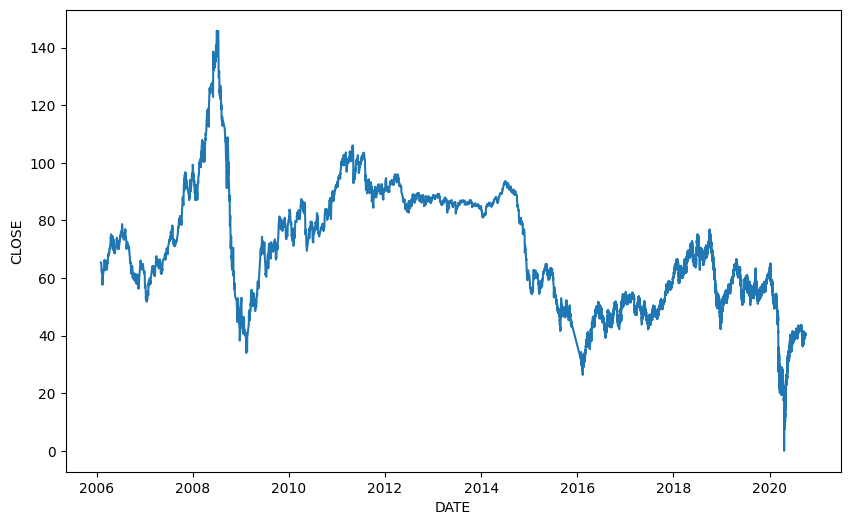

In [26]:
plt.xlabel('DATE')
plt.ylabel('CLOSE')
plt.plot(df.index, df['CLOSE'])
plt.show()

In [27]:
#Determine rolling statistics
#window size = 12 denotes 12 months, giving rolling mean at yearly level
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
rolmean.head(25)

,CLOSE
DATE,
2006-02-03,NaN
2006-02-06,NaN
2006-02-07,NaN
2006-02-08,NaN
2006-02-09,NaN
2006-02-10,NaN
2006-02-13,NaN
2006-02-14,NaN
2006-02-15,NaN


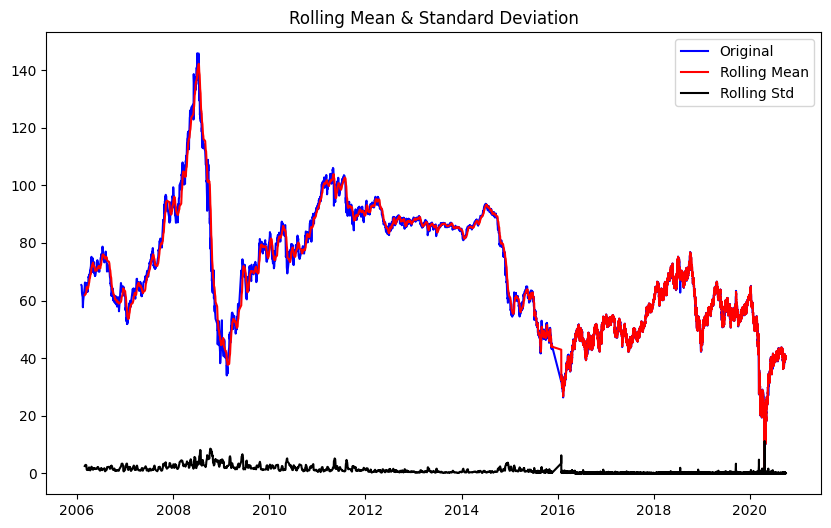

In [28]:
# #Plot rolling statistics
# orig = plt.plot(df, color='blue', label='Original')
# mean = plt.plot(rolmean, color='red', label='Rolling Mean')
# std = plt.plot(rolstd, color='black', label='Rolling Std')
# plt.legend(loc='best')
# plt.title('Rolling Mean & Standard Deviation')
# plt.show(block=False)

#Plot rolling statistics
orig = plt.plot(df.index, df['CLOSE'], color='blue', label='Original')
mean = plt.plot(rolmean.index, rolmean['CLOSE'], color='red', label='Rolling Mean')
std = plt.plot(rolstd.index, rolstd['CLOSE'], color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)  # اجازه می‌دهد تا کدهای بعدی بلافاصله اجرا شوند، در حالی که نمودار همچنان نمایش داده می‌شود.


<div dir="ltr" style="text-align: left;">
    From the above chart, it can be seen that the moving average, even though the moving standard deviation remains significantly constant over time, has a trend component. For our time series to be stationary, we need to ensure that both moving statistics, namely the mean and standard deviation, are constant over time. Therefore, the curves of both should be parallel to the x-axis, which is not the case for us.
</div>
<br><br/>
<div dir="ltr" style="text-align: left;">
    To reinforce the hypothesis that our time series is not stationary, the ADCF test should be conducted, which requires a powerful computer.
</div>


##

<div dir="ltr" style="text-align: left;">
    <h1 sans-serif; font-weight: bold;">4- Augmented Dickey-Fuller Test (ADF):</h1>
    <p  font-size: 18px; text-align: justify;">
        In this test, the null hypothesis is that the time series is not stationary. By conducting this test, we can assess the stationarity or non-stationarity of the time series:
        <br>
        2-1- (H0 = Non-Stationarity of Data)
        <br>
        H0 < 0.05 indicates that the data frame is stationary.
        <br>
        2-2. The p-value (0 ≤ p ≤ 1) should be as low as possible. The critical values at different confidence intervals should be close to the test statistic value.
    </p>
</div>


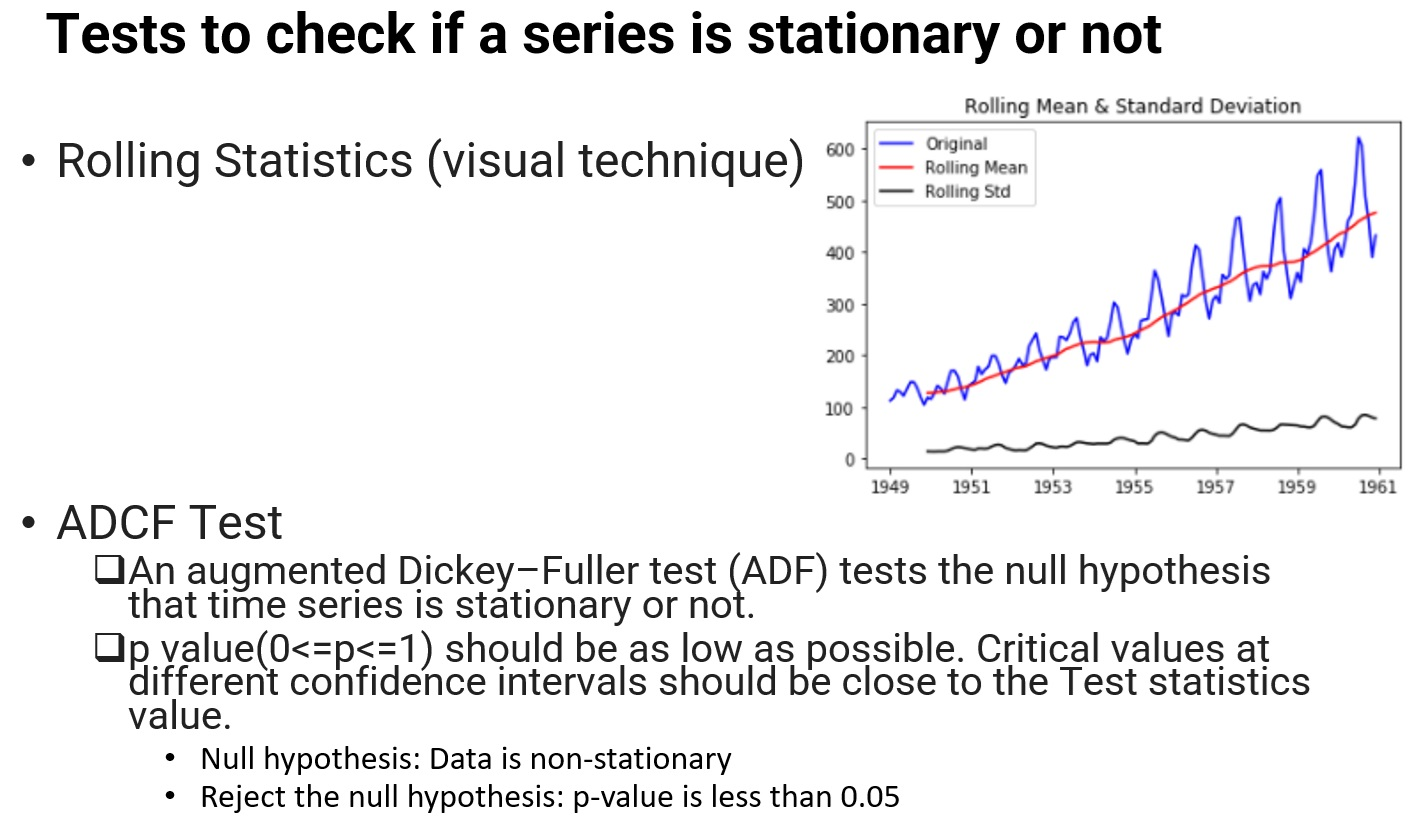

In [29]:
df['CLOSE'].dtype

dtype('float64')

In [31]:
df['CLOSE'] = df['CLOSE'].astype('float32')

### * Solution 1: Decrease size of data

In [32]:
# result = adfuller(df['CLOSE'])

# print('ADF Statistic:', result[0])
# print('p-value:', result[1])
# print('Critical Values:')
# for key, value in result[4].items():
#     print(key, ':', value)

In [33]:
# df['CLOSE'].dtype

#### &#9899; Result: Above code had below error:
MemoryError: Unable to allocate 1.21 GiB for an array with shape (1262454, 129) and data type float64

### * Solution 2: Decrease size of data

In [34]:
# Randomly select 50% of the data
sample_df = df['CLOSE'].sample(frac=0.5, random_state=42)

# Perform the Augmented Dickey-Fuller test
result = adfuller(sample_df)

# Print the ADF statistic
print('ADF Statistic:', result[0])

# Print the p-value
print('p-value:', result[1])

# Print the critical values for the test
print('Critical Values:')
for key, value in result[4].items():
    print(key, ':', value)


ADF Statistic: -795.3255094164837
p-value: 0.0
Critical Values:
1% : -3.430360360757198
5% : -2.861544579334829
10% : -2.566772437412286


In [35]:
result

(-795.3255094164837,
 0.0,
 0,
 631163,
 {'1%': -3.430360360757198,
  '5%': -2.861544579334829,
  '10%': -2.566772437412286},
 4820981.964682102)

In [36]:
# Import the adfuller function from the statsmodels library
from statsmodels.tsa.stattools import adfuller

# Select a subset of the data (e.g., the most recent years)
recent_data = df['CLOSE'].tail(150000)  # Specify the required number of samples

# Perform the Dickey-Fuller test and print the results
print('Results of Dickey-Fuller Test:')
dftest = adfuller(recent_data)
print('p-value:', dftest[1])


Results of Dickey Fuller Test:
p-value 0.5071033517660599


#### &#9899; Result: Above code had below error:
"We cannot determine stationarity using only 50% or 150000 record of the data; therefore, we must review the code below."

##

### * Solution 3: Decrease Calculations with maxlag

<div dir="LFT";style="text-align: LEFT;">
    <p  sans-serif; font-size: 18px; text-align: justify;">
        Concept of Lag: Lag refers to the number of time steps (observations) before the current value that is included in the regression model. In other words, lags input previous values of the time series into the model to measure the impact of past values on the current state of the time series.
        <br><br>
        Choosing an appropriate value for maxlag can impact the accuracy of the test results. If maxlag is too small, important features of the time series may be missed, and if it is too large, it may lead to overfitting and reduced accuracy.
        <br><br>
        Important considerations for choosing maxlag:
        <br><br>
        - Length of the time series: The longer your time series (which is long here), the larger maxlag you can choose, as more data is available for parameter estimation.
        <br><br>
        - Time periods in the data: If your time series is daily or hourly, there may be seasonal patterns or long-term cycles to consider. For daily data, a maxlag of about 20-30 may be appropriate to cover both short-term and long-term effects.
        <br><br>
        - Complexity of the time series: If your time series has complex trends or significant fluctuations, choosing a larger maxlag can be beneficial to capture all potential effects in the model. If the data is simpler (i.e., does not have significant fluctuations), a smaller maxlag like 12 or even less may suffice.
        <br><br>
        - Testing and optimization: The best way to determine the optimal value for maxlag is to try several different values and see if there are significant changes in ADF test results (such as p-value). You can also use automated tools like the Akaike Information Criterion (AIC) that automatically suggest the optimal maxlag.
        <br><br>
        Suggestion:
        <br><br>
        Considering the large volume of data, a maxlag value between 12 and 24 can be a suitable starting point.
    </p>
</div>


In [37]:
from statsmodels.tsa.stattools import adfuller

# Set the maximum lag to a lower value
maxlag = 12  # Maximum lag allowed

print('Results of Dickey Fuller Test:')
dftest = adfuller(df['CLOSE'], maxlag=maxlag)  # Perform the ADF test
print('p-value', dftest[1])  # Print the p-value

Results of Dickey Fuller Test:
p-value 0.0010840823576942949


In [38]:
# Set the maximum lag to a lower value
maxlag = 24  

print('Results of Dickey Fuller Test:')
dftest = adfuller(df['CLOSE'], maxlag=maxlag)
print('p-value', dftest[1])

Results of Dickey Fuller Test:
p-value 0.00028718182322395674


##

<div dir="ltr";style="text-align: LEFT;">
    <h1  style="font-weight: bold;">&#9899; Results of the ADF Test:</h1>
    <p style="font-size: 24px; text-align: justify;">
    Analyzing both p-values shows they are less than 0.05, indicating that in both cases, the null hypothesis (non-stationarity) is rejected, and the time series is likely stationary.
    </p>
    <h1 style="font-weight: bold;text-align: justify">"However, given that the entire dataset was not analyzed due to its large size, we will try to use other methods to achieve stationarity in the data going forward."</h1>
</div>


#

<div dir="ltr">
    <div style="text-align: left;">
        <h1 style="font-weight: bold;">5- Data Transformation to achieve Stationarity Time Series :</h1>
    </div>
</div>

### 5-1-Log Scale Transformation: 

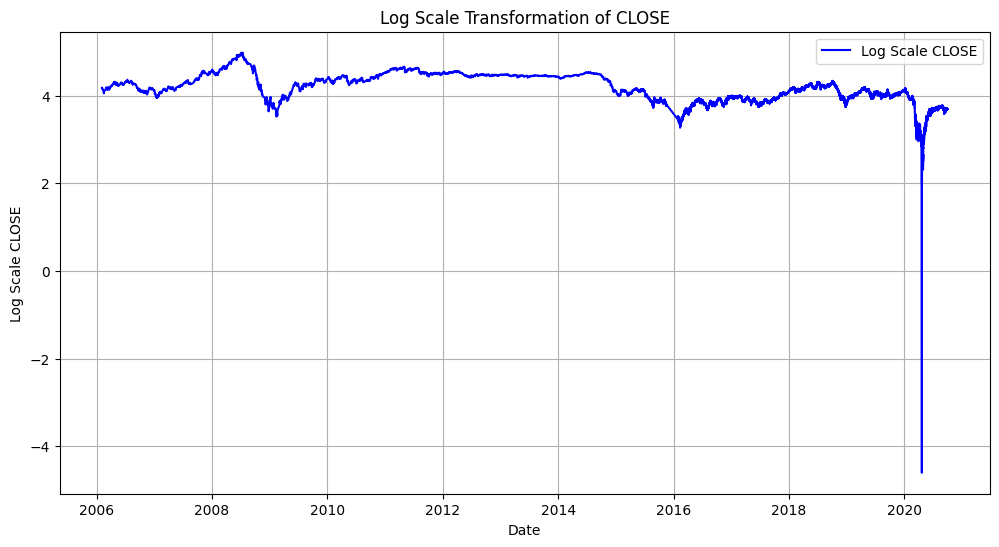

In [39]:
# Estimating trend
# Convert to logarithmic scale for all columns
df_logScale = np.log(df)

# Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(df_logScale['CLOSE'], label='Log Scale CLOSE', color='blue')
plt.title('Log Scale Transformation of CLOSE')
plt.xlabel('Date')
plt.ylabel('Log Scale CLOSE')
plt.legend()
plt.grid(True)
plt.show()


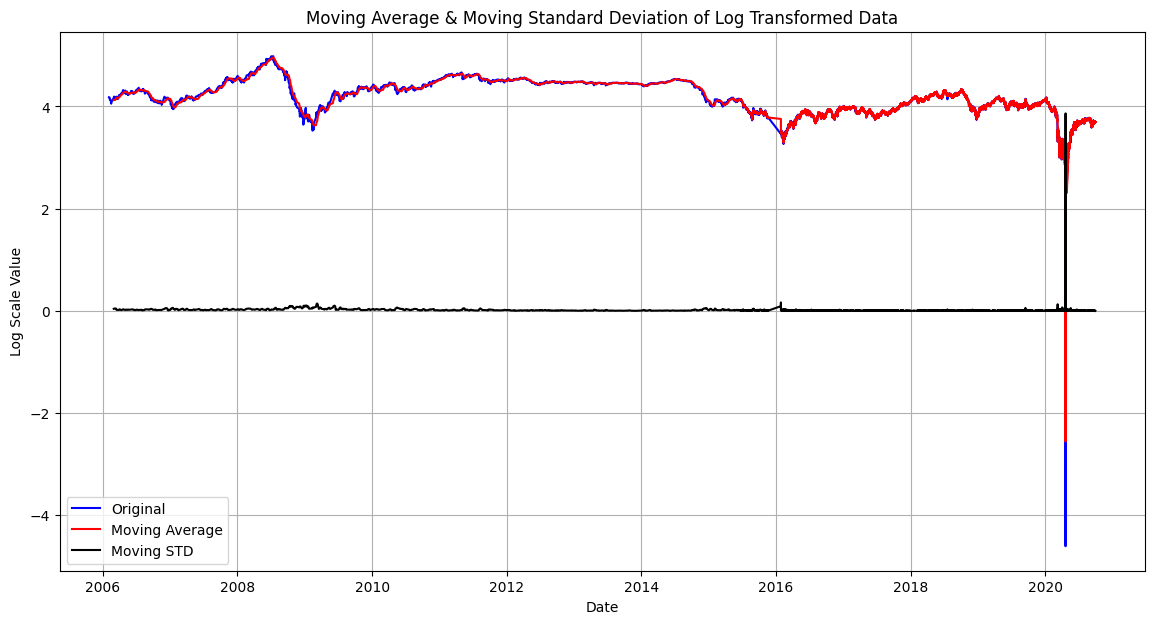

In [40]:
# Checking changes in the moving average and moving standard deviation of the log data
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()

# Plotting the data
plt.figure(figsize=(14, 7))  # Set the figure size
plt.plot(df_logScale['CLOSE'], color='blue', label='Original')
plt.plot(movingAverage['CLOSE'], color='red', label='Moving Average')
plt.plot(movingSTD['CLOSE'], color='black', label='Moving STD')

# Final settings for the plot
plt.legend(loc='best')
plt.title('Moving Average & Moving Standard Deviation of Log Transformed Data')
plt.xlabel('Date')  # Adding x-axis label
plt.ylabel('Log Scale Value')  # Adding y-axis label
plt.grid(True)  # Adding grid for better readability
plt.show(block=False)


### 5-2-Dataset LogScale Minus MovingAverage: 

In [41]:
dflogScaleMinusMovingAverage = df_logScale - movingAverage
dflogScaleMinusMovingAverage.head(12)

,CLOSE
DATE,
2006-02-03,NaN
2006-02-06,NaN
2006-02-07,NaN
2006-02-08,NaN
2006-02-09,NaN
2006-02-10,NaN
2006-02-13,NaN
2006-02-14,NaN
2006-02-15,NaN


In [42]:
#Remove NAN values
dflogScaleMinusMovingAverage.dropna(inplace=True)
dflogScaleMinusMovingAverage.head(10)

,CLOSE
DATE,
2006-03-01,0.044812
2006-03-02,0.065218
2006-03-03,0.066934
2006-03-06,0.044120
2006-03-07,0.029083
2006-03-08,0.007059
2006-03-09,0.016535
2006-03-10,0.004760
2006-03-13,0.025396


In [43]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


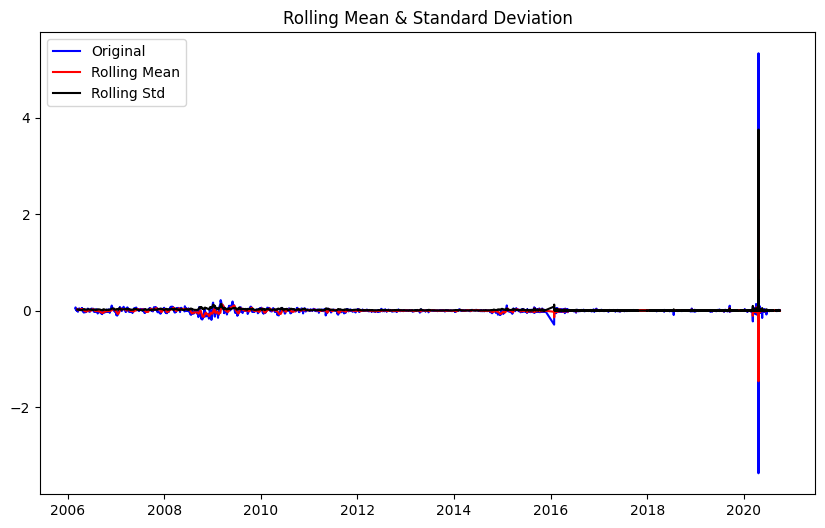

In [44]:
test_stationarity(dflogScaleMinusMovingAverage)

<div dir="ltr" style="text-align: left;">
    <h1 style="font-weight: bold;">&#9899; Results of the Dataset LogScale Minus Moving Average:</h1>
    <p style="font-size: 24px; text-align: justify;">
    Considering the above figure, we will have a stationary time series because the two lines of moving average and standard deviation have become parallel.
    </p>
</div>


##

### 5-3-Testing Time Shift Transformation Technique:  <a name="shift"></a>

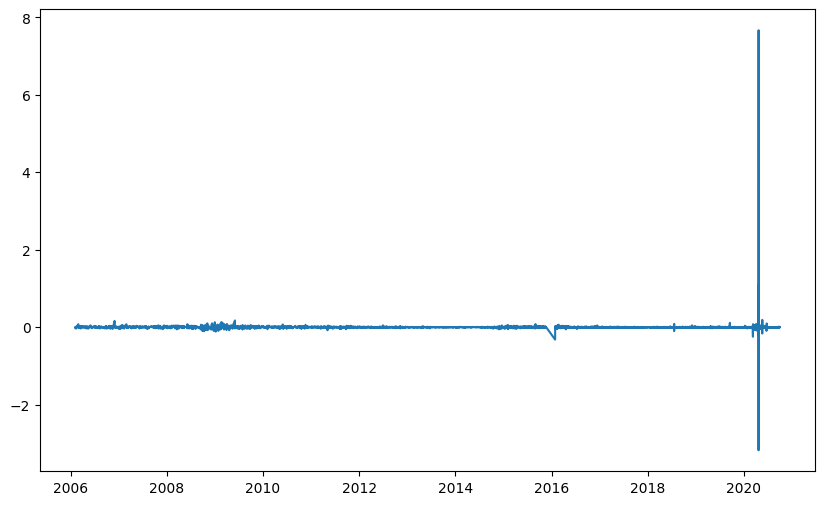

In [45]:
# similar I in ARIMA:
# برای ایجاد تفاضل که در آريما براي ايجاد استفاده ميشود، دیتاست لگاریتم گرفته شده را منهای گام قبلی خودش با استفاده از تابع شيفت(1) مینماییم:
df_logScaleDiffShifting = df_logScale - df_logScale.shift(1)
plt.plot(df_logScaleDiffShifting)

In [46]:
df_logScaleDiffShifting.head(5)

,CLOSE
DATE,
2006-02-03,NaN
2006-02-06,-0.003985
2006-02-07,-0.031516
2006-02-08,-0.008596
2006-02-09,0.001118


In [47]:
df_logScaleDiffShifting.dropna(inplace=True)
df_logScaleDiffShifting.head(5)

,CLOSE
DATE,
2006-02-06,-0.003985
2006-02-07,-0.031516
2006-02-08,-0.008596
2006-02-09,0.001118
2006-02-10,-0.012534


In [48]:
# انتخاب زیرمجموعه از داده ها (مثلاً داده های چند سال اخیر)
recent_data = df_logScaleDiffShifting['CLOSE'].tail(150000)  # تعداد نمونه های موردنیاز را تعیین کنید

print('Results of Dickey Fuller Test:')
dftest = adfuller(recent_data)
print('p-value', dftest[1])

Results of Dickey Fuller Test:
p-value 0.0


<div dir="ltr" style="text-align: left;">
    <h1 style="font-weight: bold;">&#9899; Results of the Time Shift Transformation Technique:</h1>
    <p style="font-size: 20px; text-align: justify;">
    Although the data was stationary and didn't require another step, we dropped NA values again and performed the ADF test on it, resulting in an improved p-value.
    </p>
</div>


#

## 5-4- Plotting ACF(Auto Correlation Function) & PACF(Partial Auto Correlation Function):
 <a name="acf-pacf"></a>

<div dir="ltr" style="text-align: left;">
    <h1 style="font-size: 18px; text-align: justify;">
    ACF (Auto Correlation Function): The correlation of time series data (y-axis) with itself, as well as with one, two, or three previous observations (x-axis), shows how today's data relates to previous days. For example, if you want to understand how today's temperature relates to yesterday's or two days ago, ACF tells you how similar today is to earlier days while considering everything together. When comparing today to yesterday, it takes into account both yesterday's and the earlier days' effects.
    <br/><br/>
    If the vertical axis represents correlation and the x-axis represents lag, the graph initially shows a correlation of zero. Wherever the graph intersects the y-axis at zero is the appropriate point for Q.
    <br/><br/>
    PACF (Partial Auto Correlation Function): This is similar to ACF but has one important difference: when comparing today with two days ago, it removes the effect of yesterday and looks only at the direct relationship between today and two days ago. PACF attempts to focus solely on the direct influence of each day while ignoring the effects of intermediate days.
    <br/><br/>
    Q = ACF (at y=0)
    <br/><br/>
    P = PACF (at y=0)
    <br/>
    </h1>
</div>


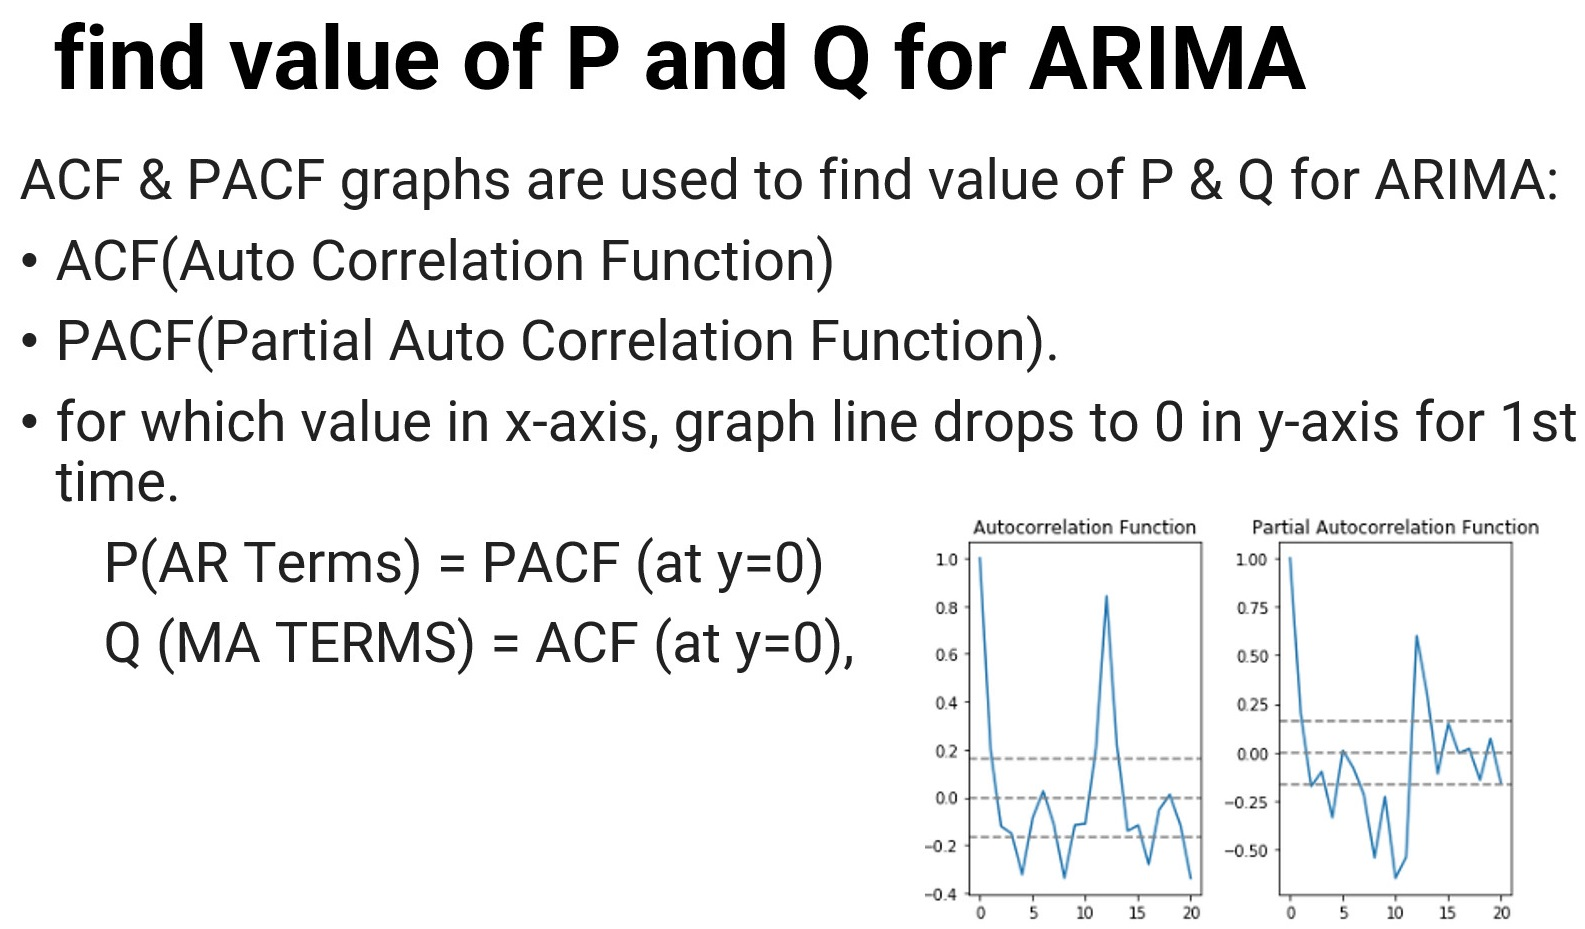

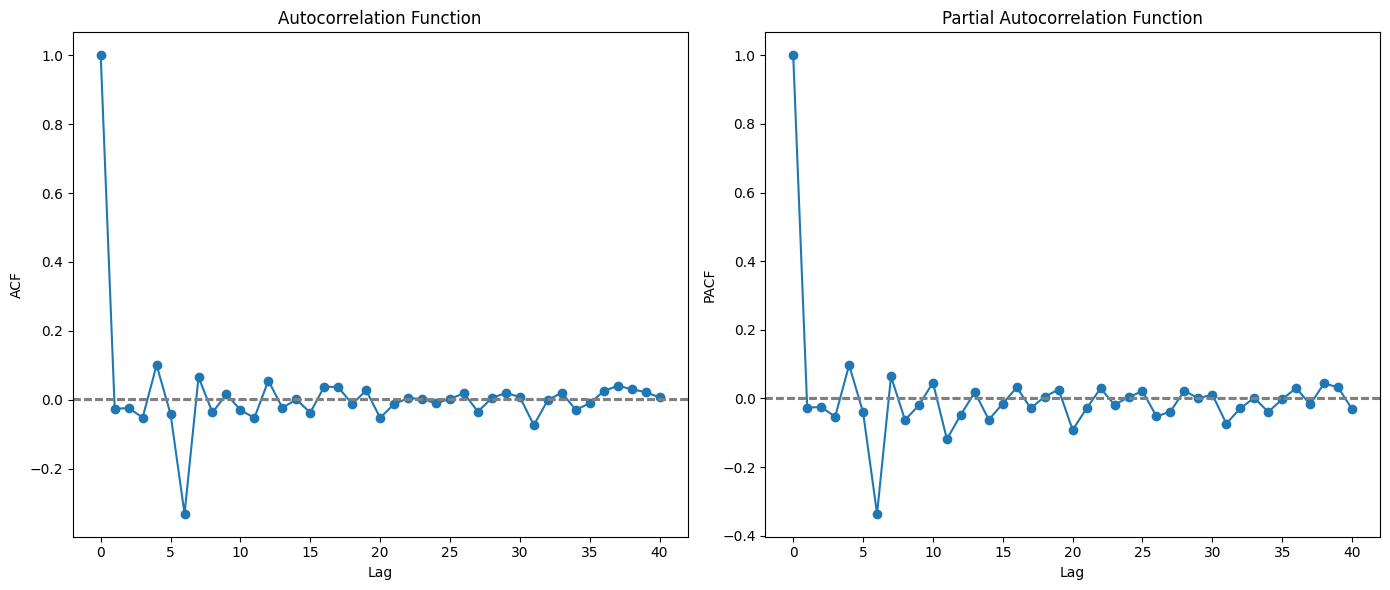

In [49]:
# Calculating ACF and PACF
# OLS (Ordinary Least Squares): This method is used to estimate parameters of regression models, aiming to minimize the sum of squared errors.
# method='ols' ==> To estimate the direct correlation between time series values at different lags.

lag_acf = acf(df_logScaleDiffShifting, nlags=40)
lag_pacf = pacf(df_logScaleDiffShifting, nlags=40, method='ols')

# Plotting ACF
plt.figure(figsize=(14, 6))  # Set figure size
plt.subplot(121)
plt.plot(lag_acf, marker='o', linestyle='-')
plt.axhline(y=0, linestyle='--', color='gray')
# -1.96: used as a fixed value to determine the confidence interval limits at 95%.
# Divide by the square root of the number of observations for precise plotting.
plt.axhline(y=-1.96/np.sqrt(len(df_logScaleDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_logScaleDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('Lag')  # X-axis label
plt.ylabel('ACF')  # Y-axis label

# Plotting PACF
plt.subplot(122)
plt.plot(lag_pacf, marker='o', linestyle='-')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_logScaleDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_logScaleDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')  # X-axis label
plt.ylabel('PACF')  # Y-axis label

plt.tight_layout()
plt.show()


In [50]:
lag_acf

array([ 1.00000000e+00, -2.65564522e-02, -2.42441719e-02, -5.17878453e-02,
        1.00385736e-01, -4.20281446e-02, -3.31308867e-01,  6.54211817e-02,
       -3.71623937e-02,  1.61901046e-02, -3.01719895e-02, -5.27534337e-02,
        5.53929367e-02, -2.35714530e-02,  6.14694751e-04, -3.74930532e-02,
        3.81158867e-02,  3.65310068e-02, -1.30463250e-02,  2.72483806e-02,
       -5.26689017e-02, -1.27543688e-02,  4.31958365e-03,  2.70347454e-03,
       -1.07681140e-02,  2.51039091e-03,  1.83707691e-02, -3.47503252e-02,
        5.15267315e-03,  1.94563601e-02,  7.98916590e-03, -7.40785274e-02,
       -1.16568661e-03,  2.02706327e-02, -2.94364993e-02, -1.04756633e-02,
        2.43121374e-02,  4.06343206e-02,  3.04354598e-02,  2.18030538e-02,
        6.69478440e-03])

#

In [51]:
# from numpy import where
# ARIMA Model Lag Selection: find point with y=0
# This code determines the maximum lags for AR (Auto-Regressive) and MA (Moving Average) components of an ARIMA model:
# This helps in determining appropriate values for P and Q in the ARIMA model.

# **Calculate Thresholds**:
#   - `threshold_ar`: 50% of the maximum ACF value (excluding lag 0) for AR.
#  - `threshold_ma`: 50% of the maximum PACF value (excluding lag 0) for MA.
threshold_ar = lag_acf[1:].max() * 0.5
threshold_ma = lag_pacf[1:].max() * 0.5 

# **Find Maximum Lags**:
#    - `ar_maxlag`: The first lag where ACF drops below `threshold_ar`.
#    - `ma_maxlag`: The first lag where PACF drops below `threshold_ma`.
ar_maxlag = where(lag_acf < threshold_ar)[0][0]
ma_maxlag = where(lag_pacf < threshold_ma)[0][0]

# Results:
print('AR Max Lag:', ar_maxlag)
print('MA Max Lag:', ma_maxlag)

AR Max Lag: 1
MA Max Lag: 1


<div dir="ltr";style="text-align: left;"> <h1 style="font-weight: bold;">&#9899; Results of ACF & PACF Operations:</h1> <p style="font-size: 20px; text-align: justify;"> To determine the values of P and Q in the ARIMA model, the ACF and PACF plots are used. <br/> If the vertical axis represents correlation and the x-axis represents lags, the plot initially has a correlation of zero with itself. The key is that wherever the plot crosses the y-axis at zero, that point is considered a suitable value for p. </p> </div> P = ACF (at y=0), Q = PACF (at y=0) ===> p=~ 1, Q=~ 1

<div dir="ltr">
    <div style="text-align: left; font-size: 20px;">
        <h1 style="font-weight: bold; text-align: justify;">6- Building Models :</h1>
        ARIMA models (AutoRegressive Integrated Moving Average) are statistical models used for analyzing and forecasting time series data. These models are a generalization of ARMA models (AutoRegressive Moving Average) and are particularly useful when the data shows signs of non-stationarity.
        <br/>
        An ARIMA (p, d, q) model consists of the following: 
        <br/>
        • Regression part (AR) = p
        <br/>
        • Differencing part (I) used for differencing and stabilizing the data = d
        <br/>
        • Moving Average part (MA) = q
    </div>
</div>


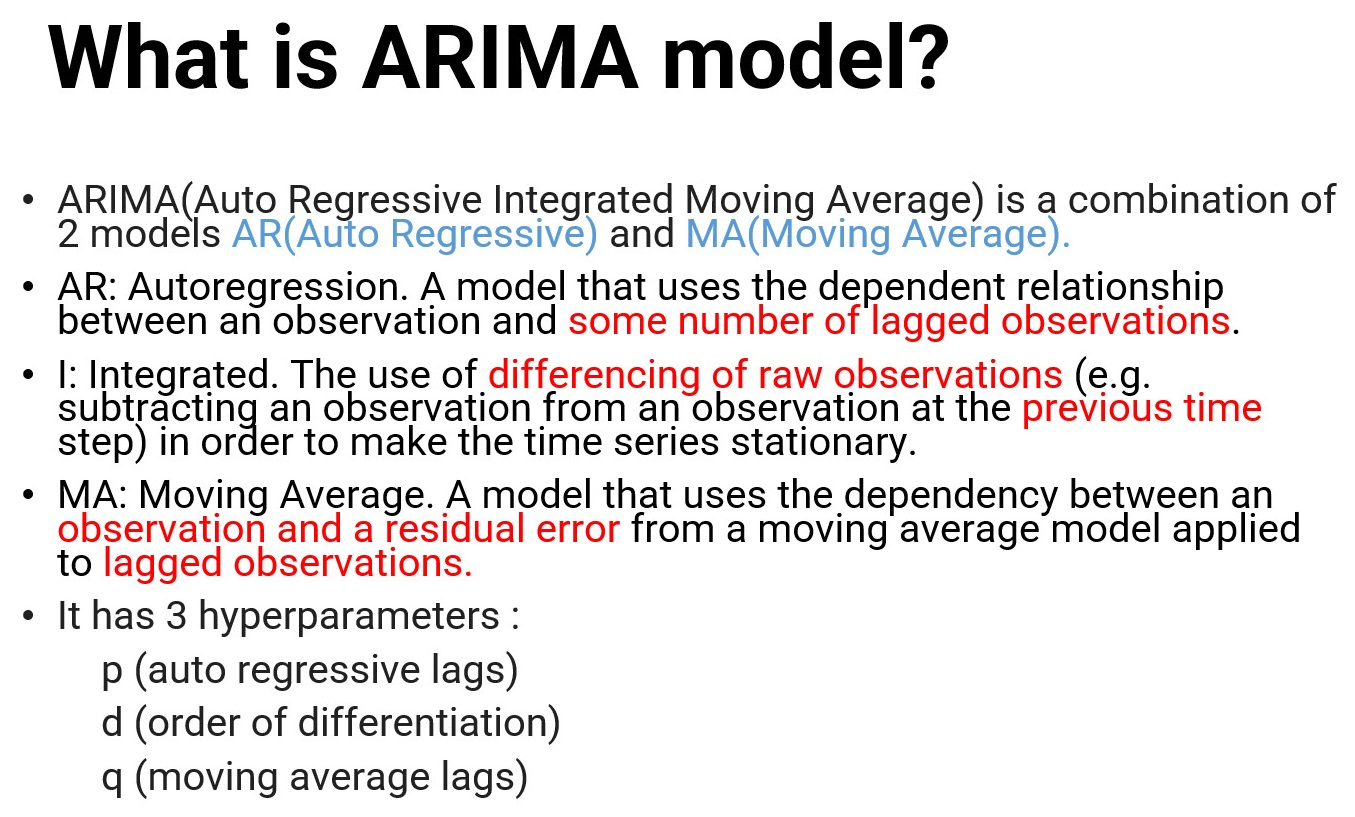

## 5-1- AR(Auto-Regressive) Model:  <a name="model"></a>:

Plotting AR model


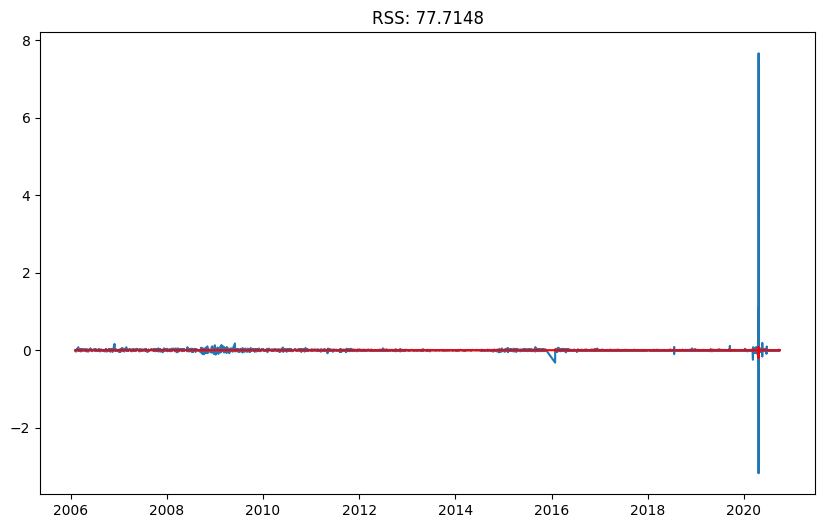

In [52]:
# using P=1 result from ACF code:
# RSS (Residual Sum of Squares)

model = ARIMA(df_logScaleDiffShifting, order=(1,0,0))
results_AR = model.fit()
plt.plot(df_logScaleDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
# Calculates the squared difference between predicted and actual values for each data point.
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - df_logScaleDiffShifting['CLOSE'])**2))
print('Plotting AR model')

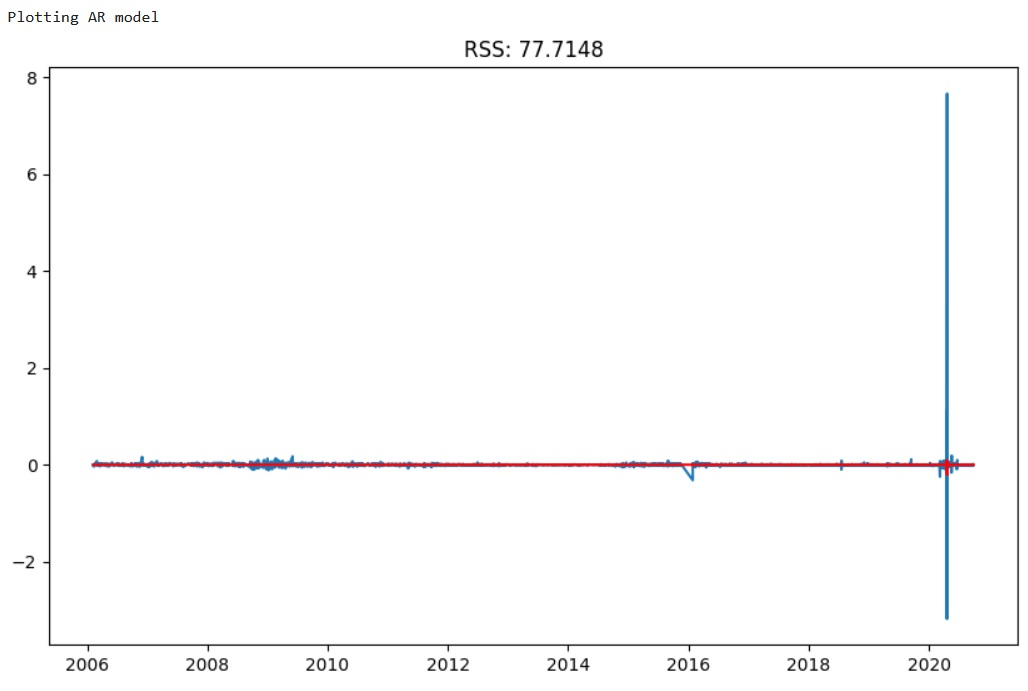

## 5-2- MA(Moving-Average) Model:  <a name="model"></a>:

Plotting MA model


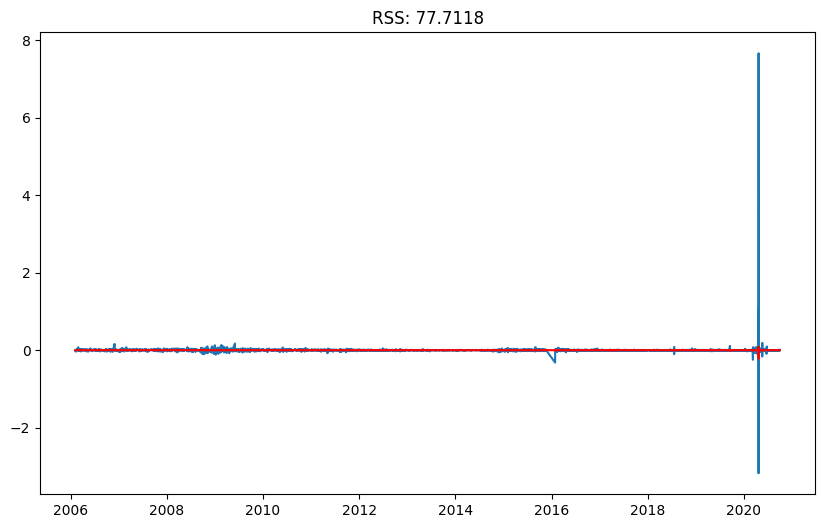

In [53]:
# Using Q=1 result from PACF code:

model2 = ARIMA(df_logScaleDiffShifting, order=(0,0,1))
results_MA2 = model2.fit()
plt.plot(df_logScaleDiffShifting)
plt.plot(results_MA2.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA2.fittedvalues - df_logScaleDiffShifting['CLOSE'])**2))
print('Plotting MA model')

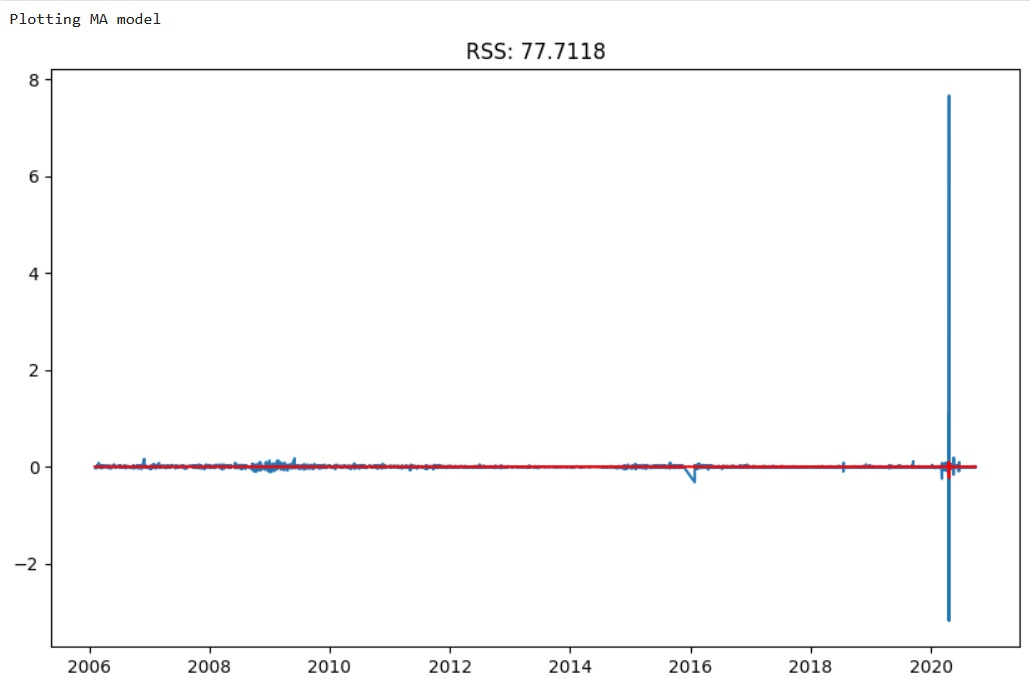

## 5-3- ARIMA Model:  <a name="model"></a>:

Plotting ARIMA model


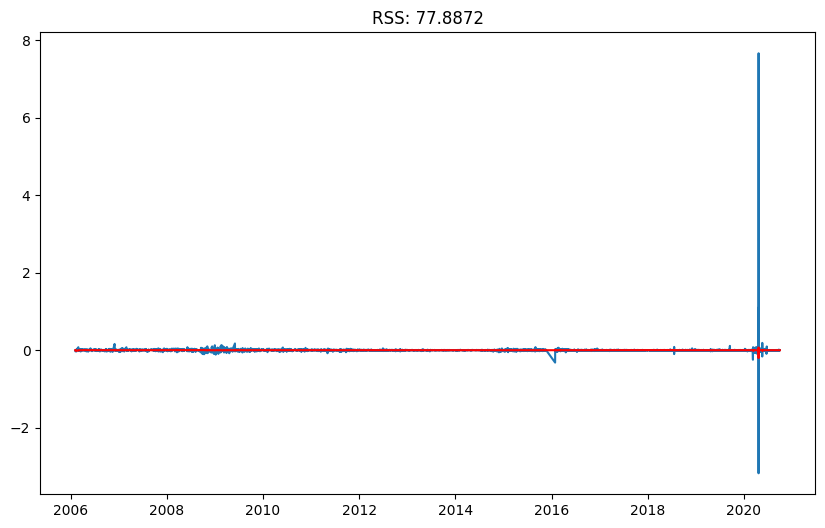

In [54]:
# Using P=1 , Q=1 result from ACF & PACF code:

# AR+I+MA = ARIMA model
# AR=1 , I=1 , MA=1

model3 = ARIMA(df_logScaleDiffShifting, order=(1,1,1))
results_ARIMA3 = model3.fit()
plt.plot(df_logScaleDiffShifting)
plt.plot(results_ARIMA3.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA3.fittedvalues - df_logScaleDiffShifting['CLOSE'])**2))  # براي فهم بيشتر خروجي هر متغير در چند خط بعد
print('Plotting ARIMA model')


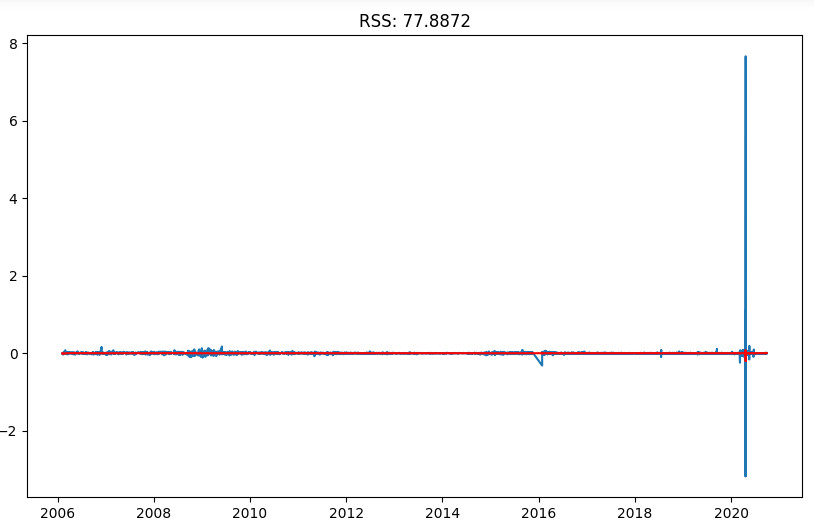

<div style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">&#9899; Results of AR & MA & ARIMA Models:</h1>
    <p style="font-family: 'B Nazanin', sans-serif; font-size: 20px; text-align: justify;">
        AR, MA, and ARIMA models provided very close RSS values. Therefore, the ARIMA model is chosen for forecasting.
        <br>
        However, at the end of the notebook, since the MA (Moving Average) model had the lowest RSS value with RSS = 77.7118, the MA model was also considered for further analysis.
        <br>
    </p>
</div>

###

<div dir="ltr">
    <div style="text-align: Left;">
        <h1 style=" font-weight: bold;">7- Prediction & Reverse transformations :</h1>
    </div>
        <div style="text-align: left;">
        <h1 style=" font-size: 32px;">7-1- Prediction with ARIMA Model :</h1>
    </div>
</div>

<div style="text-align: left;">
    <p style="font-family: 'B Nazanin', sans-serif; font-size: 20px; text-align: justify;">
        With the built ARIMA model, we will now generate forecasts. However, before plotting the forecasts, we need to revert the forecasts to their original scale. This is because our model was built on data that was log-transformed.
        <br>
        Previously, since we applied the .shift function and subtracted the previous observation's value, our time series was undergoing differencing. Therefore, it was forecasting the difference, essentially predicting how many units up or down it would go.
        <br>
        By using the cumulative sum function, we tell it to sum from the beginning until the current point, thus eliminating the effect of differencing (and then in the next code, we add it to the first value of the time series).
        <br>
        The following code creates a new time series named `predictions_ARIMA_diff` and sets it equal to the time series `results_ARIMA.fittedvalues`.
        <br>
        `results_ARIMA.fittedvalues` is the result of fitting the ARIMA model to the input data. This time series contains the model's forecasts for the input data.
    </p>
</div>

In [60]:
predictions_ARIMA_diff = pd.Series(results_ARIMA3.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

DATE
2006-02-06    0.000000
2006-02-07   -0.003985
2006-02-08   -0.017384
2006-02-09   -0.015014
2006-02-10   -0.011187
dtype: float64


<div style="text-align: left;">
    <p style="font-family: 'B Nazanin', sans-serif; font-size: 16px; text-align: justify;">
        This line of code performs a cumulative sum operation on the time series `predictions_ARIMA_diff`.
        <br>
        `predictions_ARIMA_diff` is the time series of the differences between the ARIMA model's forecasts and the actual input data. This time series contains the relative changes between the forecasts and the true values.
        <br>
        By calling `cumsum()` on `predictions_ARIMA_diff`, the cumulative sum of this time series is calculated. This means that at each point, the value at that point is equal to the sum of all previous values and the value at that point itself.
    </p>
</div>

In [61]:
#Convert to cumulative sum for inverstransform of shifting:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

DATE
2006-02-06 00:00:00    0.000000
2006-02-07 00:00:00   -0.003985
2006-02-08 00:00:00   -0.021369
2006-02-09 00:00:00   -0.036383
2006-02-10 00:00:00   -0.047570
                         ...   
2020-09-29 14:30:00   -0.443420
2020-09-29 14:31:00   -0.443391
2020-09-29 14:32:00   -0.443401
2020-09-29 14:33:00   -0.443387
2020-09-29 14:34:00   -0.443398
Length: 1262326, dtype: float64


In [62]:
# مشاهده اول سري زماني:
df_logScale['CLOSE'].iloc[0]

4.1800637

In [63]:
df_logScale.index

DatetimeIndex(['2006-02-03 00:00:00', '2006-02-06 00:00:00',
               '2006-02-07 00:00:00', '2006-02-08 00:00:00',
               '2006-02-09 00:00:00', '2006-02-10 00:00:00',
               '2006-02-13 00:00:00', '2006-02-14 00:00:00',
               '2006-02-15 00:00:00', '2006-02-16 00:00:00',
               ...
               '2020-09-29 14:25:00', '2020-09-29 14:26:00',
               '2020-09-29 14:27:00', '2020-09-29 14:28:00',
               '2020-09-29 14:29:00', '2020-09-29 14:30:00',
               '2020-09-29 14:31:00', '2020-09-29 14:32:00',
               '2020-09-29 14:33:00', '2020-09-29 14:34:00'],
              dtype='datetime64[ns]', name='DATE', length=1262327, freq=None)

In [69]:
# Initialize predictions with the first value of df_logScale['CLOSE']
predictions_ARIMA_log = pd.Series(df_logScale['CLOSE'].iloc[0], index=df_logScale.index)

# Add cumulative sum of differenced predictions to the initialized series
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

# Add initial value (first element of df_logScale['CLOSE']) to the first element of predictions_ARIMA_diff_cumsum
predictions_ARIMA_log.iloc[0] += df_logScale['CLOSE'].iloc[0]

predictions_ARIMA_log.head()

DATE
2006-02-03    8.360127
2006-02-06    4.180064
2006-02-07    4.176078
2006-02-08    4.158695
2006-02-09    4.143681
dtype: float64

In [70]:
predictions_ARIMA_log

DATE
2006-02-03 00:00:00    8.360127
2006-02-06 00:00:00    4.180064
2006-02-07 00:00:00    4.176078
2006-02-08 00:00:00    4.158695
2006-02-09 00:00:00    4.143681
                         ...   
2020-09-29 14:30:00    3.736644
2020-09-29 14:31:00    3.736673
2020-09-29 14:32:00    3.736663
2020-09-29 14:33:00    3.736677
2020-09-29 14:34:00    3.736666
Length: 1262327, dtype: float64

<div dir="ltr">
If you encounter memory issues, use the following method:
</div>
<div dir="ltr">
This code predicts the values of the "df_logScale['CLOSE']" column using the ARIMA model in a chunk-by-chunk manner to address memory problems. In each chunk, the ARIMA model is estimated, and the sum of the differences of the predicted values is calculated. Then, the sums of the chunks are added together to create the final prediction for the entire dataset.
</div>


In [65]:
# chunk_size = 100000  # Adjust chunk size based on my memory availability

# for i in range(len(df_logScale)-chunk_size, -1, -chunk_size):
#     chunk = df_logScale.iloc[i:i+chunk_size]

#     # 1. پیش‌بینی برای chunk فعلی را محاسبه کنید
# #     model3_chunk = ARIMA(chunk, order=(1, 1, 1), index=chunk.index)
#     model3_chunk = ARIMA(chunk, order=(1, 1, 1))
#     results_ARIMA3_chunk = model3_chunk.fit()
#     predictions_ARIMA_diff_chunk = pd.Series(results_ARIMA3_chunk.fittedvalues, copy=True, index=chunk.index)

#     # 2. محاسبه مجموع تفاضل پیش‌بینی شده برای chunk
#     predictions_ARIMA_diff_cumsum_chunk = predictions_ARIMA_diff_chunk.cumsum()

#     if i == len(df_logScale)-chunk_size:
#         predictions_ARIMA_log = predictions_ARIMA_diff_cumsum_chunk.copy()
#     else:
#         predictions_ARIMA_log = predictions_ARIMA_log.append(predictions_ARIMA_diff_cumsum_chunk)

# # اضافه کردن مقدار اولیه (اولین عنصر df_logScale['CLOSE']) به اولین عنصر predictions_ARIMA_diff_cumsum
# predictions_ARIMA_log.iloc[0] += df_logScale['CLOSE'].iloc[0]



In [71]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA

DATE
2006-02-03 00:00:00    4273.239352
2006-02-06 00:00:00      65.370019
2006-02-07 00:00:00      65.110011
2006-02-08 00:00:00      63.987936
2006-02-09 00:00:00      63.034401
                          ...     
2020-09-29 14:30:00      41.956935
2020-09-29 14:31:00      41.958152
2020-09-29 14:32:00      41.957725
2020-09-29 14:33:00      41.958339
2020-09-29 14:34:00      41.957864
Length: 1262327, dtype: float64

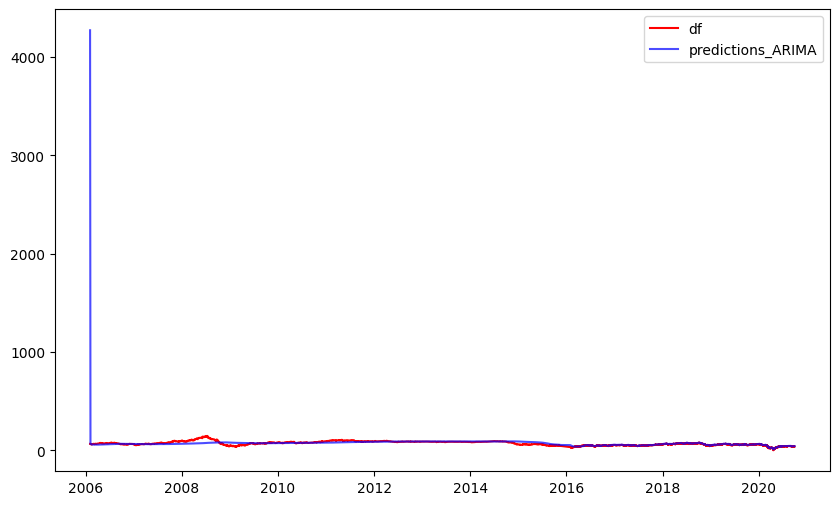

In [72]:
# Set different colors and transparency
plt.plot(df, color='red', label='df')
plt.plot(predictions_ARIMA, color='blue', alpha=0.7, label='predictions_ARIMA')

# Add legend and show plot
plt.legend()
plt.show()

<div dir="ltr">
    <div style="text-align: left;">
        <h1 style=" font-weight: bold;">7-1-1 Evaluation with ARIMA Model :</h1>
    </div>
</div>

In [86]:
# from sklearn.metrics import mean_squared_error

# Calculate RMSE on logarithmic values
rmse_log = np.sqrt(mean_squared_error(df_logScale['CLOSE'], predictions_ARIMA_log))

# Convert logarithmic RMSE to linear RMSE
# Inverse Transformation of Log is exp.
rmse_arima = np.exp(rmse_log) - 1

print('RMSE_arima:', rmse_arima*100)

RMSE_arima: 5.190017703279426


In [87]:
from sklearn.metrics import mean_absolute_error

mae_log = mean_absolute_error(df_logScale['CLOSE'], predictions_ARIMA_log)
mae_arima = np.exp(mae_log) - 1
print('MAE_arima:', mae_arima*100)

MAE_arima: 4.151817960979476


In [88]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Prevent division by zero by adding a very small value to y_true
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate MAPE on the original (non-logarithmic) values
mape = mean_absolute_percentage_error(df_logScale['CLOSE'], predictions_ARIMA_log)

# Convert logarithmic MAPE to linear MAPE
mape_arima = np.exp(mape_log) - 1

print('MAPE_arima:', mape_arima)


MAPE_arima: 1.932035353684817


In [89]:
from sklearn.metrics import r2_score

# Calculate the coefficient of determination (R²):
# Compute R² on the logarithmic values
r2_log = r2_score(df_logScale['CLOSE'], predictions_ARIMA_log)

# Convert logarithmic R² to linear R²
r2_arima = np.exp(2 * r2_log) - 1

print('R²_arima:', r2_arima)


R^2_arima: 5.833757767239898


In [91]:
evaluation_metrics = {
    'Metric': ['RMSE', 'MAE', 'MAPE', 'R^2'],
    'Value': [f'{rmse_arima}%', f'{mae_arima}%', f'{mape_arima}%', f'{r2_arima}%']
}

# تبدیل دیکشنری به DataFrame
df_metrics_arima = pd.DataFrame(evaluation_metrics)

# نمایش DataFrame
df_metrics_arima


,Metric,Value
0,RMSE,0.05190017703279426%
1,MAE,0.04151817960979476%
2,MAPE,1.932035353684817%
3,R^2,5.833757767239898%


<div dir="rtl">
    <div style="text-align: RIGHT;">
        <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">&star;7-1-2-تحلیل نتایج مدل ARIMA: </h1>
        <h1 style="font-family: 'B Nazanin', sans-serif; font-size: 18px;">مدل ARIMA برای تحلیل و پیش‌بینی داده‌ها مورد استفاده قرار گرفت و نتایج ارزیابی مدل به‌صورت زیر گزارش شده است:
 </h1>
    </div>
    <div dir="rtl" style="text-align: right; font-family: 'Nazanin', serif;">
    <p style="font-size: 16px;">
        <strong>RMSE (Root Mean Squared Error): 0.0519%</strong><br>
        <span style="display: block; text-align: right;">RMSE معیاری از دقت پیش‌بینی مدل است که میزان انحراف مقادیر پیش‌بینی‌شده از مقادیر واقعی را نشان می‌دهد. مقدار پایین RMSE نشان‌دهنده دقت بالای مدل در پیش‌بینی مقادیر است. در این حالت، مقدار RMSE مدل ARIMA نشان‌دهنده دقت خوب در پیش‌بینی است.</span>
    </p>
    <div dir="rtl" style="text-align: right; font-family: 'Nazanin', serif;">
    <p style="font-size: 16px;">
        <strong>MAE (Mean Absolute Error): 0.0415%</strong><br>
        <span style="display: block; text-align: right;"> MAE میانگین خطاهای مطلق پیش‌بینی مدل را اندازه‌گیری می‌کند. این معیار به‌طور مستقیم میزان متوسط انحراف پیش‌بینی‌ها از مقادیر واقعی را نشان می‌دهد. مقدار پایین MAE به معنی دقت بالای پیش‌بینی‌ها است و مدل ARIMA در اینجا عملکرد مناسبی دارد.</span>
    </p>
    <div dir="rtl" style="text-align: right; font-family: 'Nazanin', serif;">
    <p style="font-size: 16px;">
        <strong>MAPE (Mean Absolute Percentage Error): 1.93%</strong><br>
        <span style="display: block; text-align: right;"> MAPE درصد میانگین خطاهای مطلق را به‌صورت درصدی از مقادیر واقعی اندازه‌گیری می‌کند. این معیار به وضوح بیان می‌کند که پیش‌بینی‌ها به‌طور متوسط چه درصدی از مقادیر واقعی انحراف دارند. مقدار پایین MAPE نشان‌دهنده عملکرد خوب مدل در پیش‌بینی مقادیر است. مدل ARIMA با MAPE برابر با 1.93% نشان‌دهنده پیش‌بینی‌های دقیق و قابل‌قبول است.</span>
    </p>
    <div dir="rtl" style="text-align: right; font-family: 'Nazanin', serif;">
    <p style="font-size: 16px;">
        <strong>R^2 (Coefficient of Determination): 5.83%</strong><br>
        <span style="display: block; text-align: right;"> R^2 معیاری است که نشان می‌دهد چه درصدی از تغییرات در داده‌های واقعی توسط مدل توضیح داده می‌شود. مقدار نزدیک به 100% نشان‌دهنده مدل با عملکرد بسیار خوب است. در اینجا، مقدار R^2 معادل 5.83% است، که نشان‌دهنده توانایی محدود مدل در توضیح تغییرات داده‌ها می‌باشد و ممکن است نیاز به بهبود مدل یا بررسی بیشتر داشته باشد.</span>
    </p>
    <div dir="rtl" style="text-align: right; font-family: 'Nazanin', serif;">
    <h1 style="font-weight: bold; font-size: 24px;">نتیجه‌گیری</h1>
    <div dir="rtl" style="text-align: right; font-family: 'Nazanin', serif;">
        مدل ARIMA در تحلیل و پیش‌بینی داده‌ها عملکرد نسبتا خوبی از خود نشان داده است، به‌ویژه با مقادیر پایین RMSE، MAE، و MAPE. با این حال، مقدار R^2 پایین نشان‌دهنده این است که مدل ممکن است نتواند به‌طور کامل تغییرات داده‌ها را توضیح دهد و ممکن است به بهبود بیشتری نیاز داشته باشد.
    </div>
</div>


<div dir="ltr">
    <div style="text-align: left;">
        <h1 style=" font-weight: bold;">7-1-2 Analysis of ARIMA Model Results:</h1>
        <h1 style=" font-size: 18px;">The ARIMA model was used for analyzing and forecasting the data, and the evaluation results of the model are reported as follows:</h1>
    </div>
    <div dir="ltr" style="text-align: left; ">
        <p style="font-size: 16px;">
            <strong>RMSE (Root Mean Squared Error): 0.0519%</strong><br>
            <span style="display: block; text-align: left;">RMSE is a measure of the model's forecasting accuracy, indicating how much the predicted values deviate from the actual values. A low RMSE value suggests high accuracy of the model in predicting values. In this case, the RMSE value of the ARIMA model indicates good accuracy in predictions.</span>
        </p>
        <div dir="ltr" style="text-align: left; ">
            <p style="font-size: 16px;">
                <strong>MAE (Mean Absolute Error): 0.0415%</strong><br>
                <span style="display: block; text-align: left;">MAE measures the average of the absolute errors of the model's predictions. This metric directly indicates the average deviation of the predictions from the actual values. A low MAE means high prediction accuracy, and the ARIMA model performs well in this regard.</span>
            </p>
            <div dir="ltr" style="text-align: left;">
                <p style="font-size: 16px;">
                    <strong>MAPE (Mean Absolute Percentage Error): 1.93%</strong><br>
                    <span style="display: block; text-align: left;">MAPE measures the average absolute errors as a percentage of the actual values. This metric clearly indicates what percentage the predictions deviate from the actual values on average. A low MAPE signifies good performance of the model in forecasting values. The ARIMA model, with a MAPE of 1.93%, indicates accurate and acceptable predictions.</span>
                </p>
                <div dir="ltr" style="text-align: left; ;">
                    <p style="font-size: 16px;">
                        <strong>R² (Coefficient of Determination): 5.83%</strong><br>
                        <span style="display: block; text-align: left;">R² is a metric that shows what percentage of the changes in the actual data is explained by the model. A value close to 100% indicates a very well-performing model. Here, the R² value is 5.83%, indicating the model's limited ability to explain changes in the data, and it may need improvement or further investigation.</span>
                    </p>
                    <div dir="ltr" style="text-align: left; ">
                        <h1 style="font-weight: bold; font-size: 24px;">&#9899;Conclusion</h1>
                        <div dir="ltr" style="text-align: left; ">
                            The ARIMA model has shown relatively good performance in analyzing and forecasting data, especially with low RMSE, MAE, and MAPE values. However, the low R² value indicates that the model may not fully explain the changes in the data and may require further improvement.
                        </div>
                    </div>
                </div>
            </div>
        </div>
    </div>
</div>


In [108]:
# df.to_csv('df_Step1_EDA.csv', index=True)

##

<div dir="ltr">
    <div style="text-align: left;">
        <h1 style= font-weight: bold;">&star; End of Step Two: Stationarity Check (Before Data Cleaning) - Forecasting Using the ARIMA Model</h1>
    </div>
</div>
